<img src="tecno.jpg">


# Analisis de Datos Masivos
## Practica visualizacion avanzada de los datos


## Nombre del Docente
### Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
### Gerardo Jael Esquivel Martinez

### Parte 1: Preparar los datos

Para utilizar la biblioteca folium, modificará los datos para obtener el formato correcto. En este momento, los datos están en una base de datos de SQLite y deseamos tenerla en un marco de datos de  pandas. Es necesario realizar algunos cambios más.

**Paso 1: Obtener datos y guardarlos en un marco de datos pandas.**

Primero, necesitamos obtener los datos. Nos conectaremos a la base de datos InternetSpeed.

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
conn = sqlite3.connect('InternetSpeed.db')
cur = conn.cursor()

In [3]:
query='SELECT * from average_speed'
df = pd.read_sql(query, conn)
df.head()

,index,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,0,E07000187,51.937527,21.127505,8.405785
1,1,E07000223,50.923624,20.453399,8.241653
2,2,E07000124,50.221057,20.759189,8.181407
3,3,E07000125,52.080847,20.440484,8.243290
4,4,E07000063,51.435449,20.787431,8.378082


In [4]:
df.drop('index', inplace = True, axis=1)
df.shape

(326, 4)

In [5]:
df.head()

,Area,Ping_promedio,Descarga_promedio,Carga_promedio
0,E07000187,51.937527,21.127505,8.405785
1,E07000223,50.923624,20.453399,8.241653
2,E07000124,50.221057,20.759189,8.181407
3,E07000125,52.080847,20.440484,8.243290
4,E07000063,51.435449,20.787431,8.378082


In [6]:
la_json = pd.read_json('LA_poligons.json')
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


In [8]:
df_promedio = df[['Area', 'Ping_promedio']]
df_promedio = df_promedio.rename(columns={'Area1':'LA_code'})
df_promedio.head()

,Area,Ping_promedio
0,E07000187,51.937527
1,E07000223,50.923624
2,E07000124,50.221057
3,E07000125,52.080847
4,E07000063,51.435449


In [9]:
print(df_promedio.Ping_promedio.min())
print(df_promedio.Ping_promedio.max())

0.0
70.19295547285596


In [13]:
bins = np.arange(df_promedio.Ping_promedio.min(), df_promedio.Ping_promedio.max(), 
                 (df_promedio.Ping_promedio.max()-df_promedio.Ping_promedio.min()) /6)
bins = list(bins)
print(bins)

[0.0, 11.69882591214266, 23.39765182428532, 35.09647773642798, 46.79530364857064, 58.4941295607133]


#### NOTA
LA GENERACION DEL MAPA MARCA ERROR DEBIDO A UN DATO MAL CAPTURADO EN LA BASE DE DATOS

In [17]:
import folium_utils

mymap = folium_utils.folium_top_x_preds_mapper(df_promedio, la_json, 'LA_code',
                                              'Ping_promedio', bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)

**¿Qué ocurrió? La cantidad de autoridades locales de las dos estructuras de datos dfp y la_json no coincide y Folium arroja un error.**

Examine los datos:

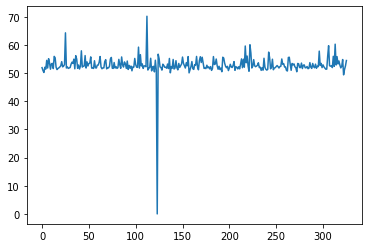

In [18]:
# Graficar datos para detectar anomalias en los datos 
df_promedio.Ping_promedio.plot()

In [21]:
#verificar el dato que tiene valor 0
df_promedio[df_promedio.Ping_promedio==0]

,Area,Ping_promedio
123,DateTime,0.0


In [22]:
# borrar datos que tienen el valor 0
df_promedio.drop(123, inplace=True)

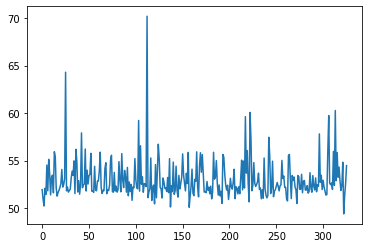

In [24]:
df_promedio.Ping_promedio.plot()

In [42]:
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio, la_json, 'LA_code',
                                              'Ping_promedio', bins)

NameError: name 'folium_utils' is not defined